In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
from wordcloud import WordCloud, STOPWORDS
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
marketing= pd.read_csv('marketing_data.csv')

### Inspect dataset

In [3]:
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain


In [4]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4    Income              2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
marketing.isna().sum(0)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [6]:
marketing.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [7]:
marketing.rename(columns={' Income ':'Income'}, inplace= True)

***Handing na value***

In [8]:
marketing.dropna(axis=0,how="any",inplace= True)

***Identify outlier with Year_Birth***

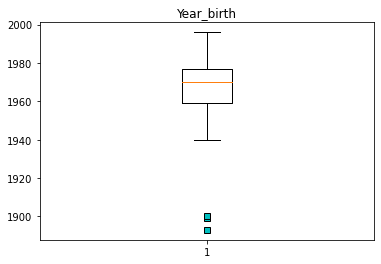

In [9]:
red_square = dict(markerfacecolor = 'c', marker = 's')
plt.boxplot(marketing.Year_Birth, flierprops=red_square)
plt.title("Year_birth")
plt.show()

In [10]:
marketing= marketing[marketing.Year_Birth>1940]

# 0- Boxplot

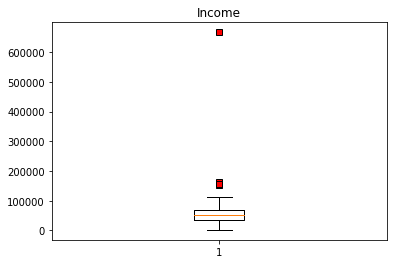

In [11]:
red_square = dict(markerfacecolor = 'r', marker = 's')
plt.boxplot(marketing.Income, flierprops=red_square)
plt.title("Income")
plt.show()

In [12]:
Q3= marketing.Income.quantile(0.75)
Q1= marketing.Income.quantile(0.25)

In [13]:
IQR= Q3-Q1
IQR

33288.5

In [14]:
upper_whisker= Q3+1.5*IQR
upper_whisker

118454.75

In [15]:
marketing= marketing[marketing.Income<upper_whisker]

# 1-Line chart

In [16]:
m_linechart=marketing.groupby('Year_Birth',as_index=False)[['MntWines','MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum()

In [17]:
m_linechart.head()

,Year_Birth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1941,1285,42,716,55,0,21
1,1943,3914,106,1644,726,184,167
2,1944,3962,465,1924,447,249,143
3,1945,3564,540,2413,465,544,527
4,1946,6911,423,2963,1143,639,817


***Manual single chart***

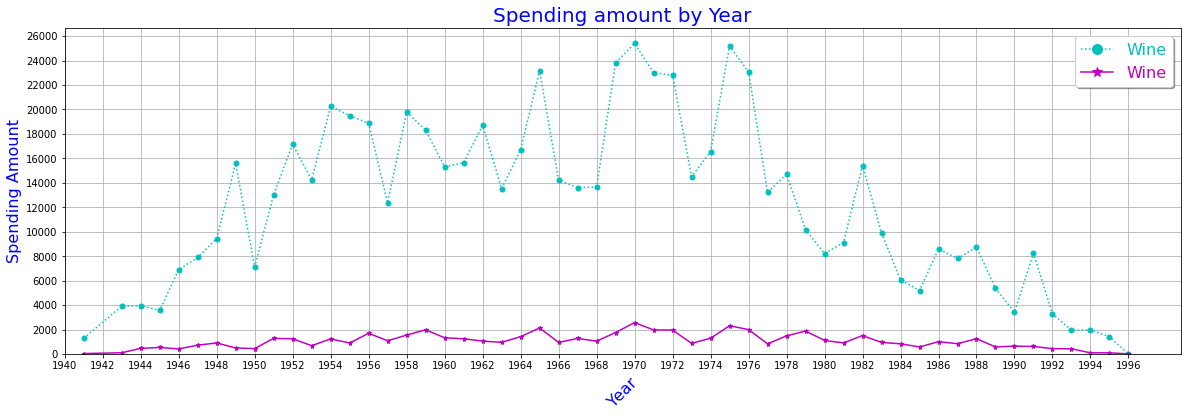

In [18]:
plt.figure(figsize= (20,6))
plt.plot(m_linechart.Year_Birth,m_linechart.MntWines,label="Wine",color="c", linestyle=":",marker="o",markersize=5)
plt.plot(m_linechart.Year_Birth,m_linechart.MntFruits,label="Wine",color="m", linestyle="-",marker="*",markersize=5)

plt.title("Spending amount by Year", color="b",fontsize=20)
plt.xlabel("Year", color="b",fontsize=16, rotation=45)
plt.ylabel("Spending Amount",color="b",fontsize=16)
plt.xticks(np.arange(1940,1998,2))
plt.yticks(np.arange(0,28000,2000))
#control start of axis
plt.ylim(0) # y axis start from 0
plt.xlim(1940) # x axis start from 1940
plt.legend(shadow=True, labelcolor="linecolor",fontsize= 16,markerscale=2)
plt.grid()

***Multiple line chart using loop***

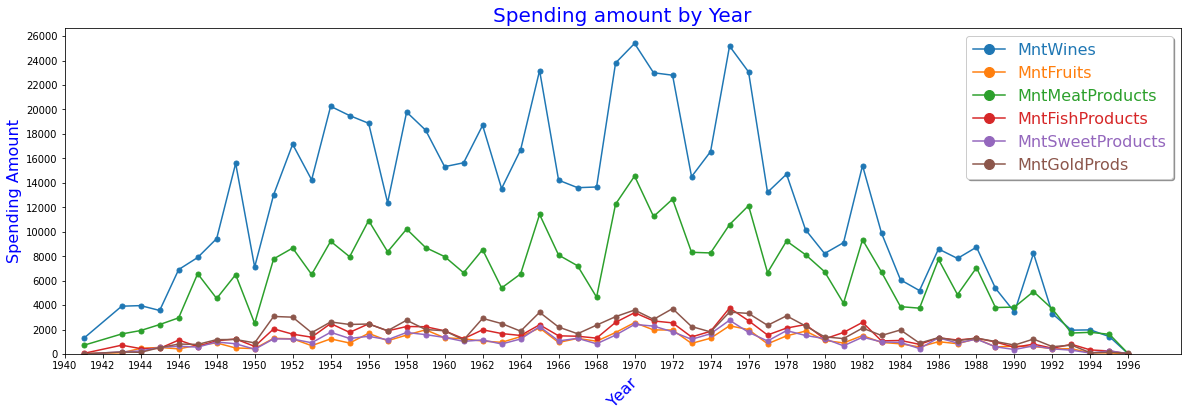

In [19]:
plt.figure(figsize= (20,6))
for column in m_linechart.loc[:,'MntWines':'MntGoldProds']:
    plt.plot(m_linechart.Year_Birth,m_linechart[column],label=column,linestyle="-",marker="o",markersize=5)

plt.title("Spending amount by Year", color="b",fontsize=20)
plt.xlabel("Year", color="b",fontsize=16, rotation=45)
plt.ylabel("Spending Amount",color="b",fontsize=16)
plt.xticks(np.arange(1940,1998,2))
plt.yticks(np.arange(0,28000,2000))
plt.ylim(0) 
plt.xlim(1940)
plt.legend(shadow=True, labelcolor="linecolor",fontsize= 16,markerscale=2)

***Fill line chart***

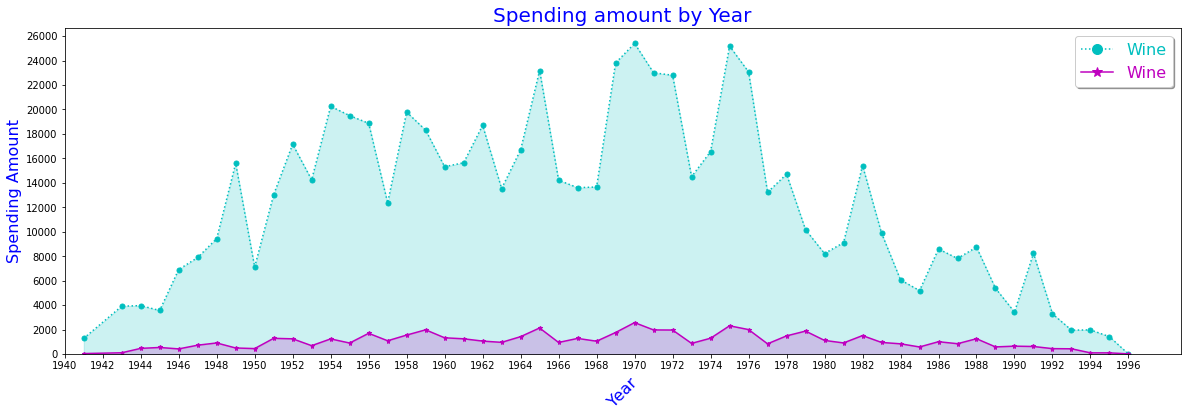

In [20]:
plt.figure(figsize= (20,6))
plt.plot(m_linechart.Year_Birth,m_linechart.MntWines,label="Wine",color="c", linestyle=":",marker="o",markersize=5)
#fill line chart
plt.fill_between(m_linechart.Year_Birth,m_linechart.MntWines,color="c",alpha=0.2)

plt.plot(m_linechart.Year_Birth,m_linechart.MntFruits,label="Wine",color="m", linestyle="-",marker="*",markersize=5)
plt.fill_between(m_linechart.Year_Birth,m_linechart.MntFruits,color="m",alpha=0.2)

plt.title("Spending amount by Year", color="b",fontsize=20)
plt.xlabel("Year", color="b",fontsize=16, rotation=45)
plt.ylabel("Spending Amount",color="b",fontsize=16)
plt.xticks(np.arange(1940,1998,2))
plt.yticks(np.arange(0,28000,2000))
plt.ylim(0)
plt.xlim(1940)
plt.legend(shadow=True, labelcolor="linecolor",fontsize= 16,markerscale=2)

# 2-Bar chart

***Simple single bar chart***

In [21]:
simple_bar= marketing.groupby('Education',as_index=False).ID.count()

In [22]:
simple_bar.head()

,Education,ID
0,2n Cycle,198
1,Basic,54
2,Graduation,1113
3,Master,364
4,PhD,475


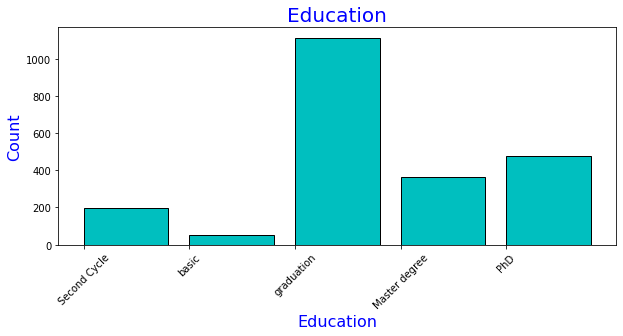

In [23]:
plt.figure(figsize= (10,4))
plt.bar(simple_bar.Education, simple_bar.ID,color="c",edgecolor="k",align="edge")

plt.title("Education", color="b",fontsize=20)
plt.xlabel("Education", color="b",fontsize=16)
plt.ylabel("Count",color="b",fontsize=16)
plt.xticks(simple_bar.Education,['Second Cycle', 'basic', 'graduation', 'Master degree', 'PhD'],rotation=45)
plt.show()

***Horizontal bar chart***

Text(0.5, 0, 'Count')

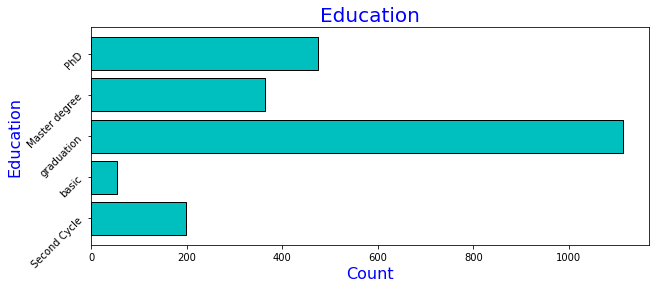

In [24]:
plt.figure(figsize= (10,4))
plt.barh(simple_bar.Education,simple_bar.ID,color="c",edgecolor="k")
plt.title("Education", color="b",fontsize=20)
plt.ylabel("Education", color="b",fontsize=16)
plt.yticks(simple_bar.Education,['Second Cycle', 'basic', 'graduation', 'Master degree', 'PhD'],rotation=45)

plt.xlabel("Count",color="b",fontsize=16)

***Stacked bar chart***

In [25]:
stackedbar= marketing.groupby('Country',as_index=False)[['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum()

In [26]:
stackedbar.head()

,Country,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Australia,42752,3689,22328,5546,4129,7132
1,Canada,84064,7680,45923,9979,7606,12143
2,Germany,36776,2980,20272,4601,2801,5768
3,India,36201,3780,22139,4810,3215,5988
4,Mexico,1729,8,817,226,122,220


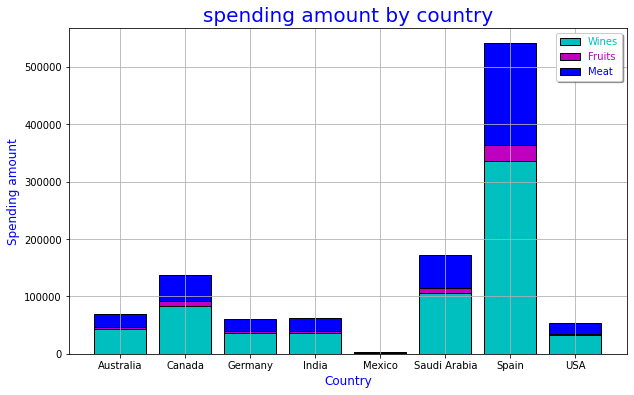

In [27]:
plt.figure(figsize= (10,6))
plt.bar(stackedbar.Country, stackedbar.MntWines,color="c",edgecolor="k",align="center",label="Wines")
plt.bar(stackedbar.Country, stackedbar.MntFruits,color="m",edgecolor="k",bottom=stackedbar.MntWines, align="center",label="Fruits")
plt.bar(stackedbar.Country, stackedbar.MntMeatProducts,color="b",edgecolor="k", 
        bottom=stackedbar.MntFruits+stackedbar.MntWines,align="center",label="Meat")

plt.title("spending amount by country", color="b",fontsize=20)
plt.xlabel("Country", color="b",fontsize=12)
plt.ylabel("Spending amount",color="b",fontsize=12)
plt.legend(shadow= True,labelcolor="linecolor")
plt.grid()
plt.show()

# 3-Histogram

***One measure histogram with assign number of bins***

Text(0, 0.5, 'count')

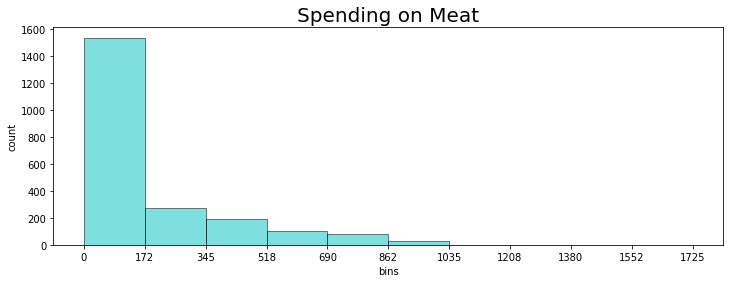

In [28]:
plt.figure(figsize=(12,4))
plt.hist(marketing.MntMeatProducts,bins=10,alpha=0.5, edgecolor="k",color="c")
plt.title("Spending on Meat",fontsize=20)
xticks=np.histogram(marketing.MntMeatProducts,bins=10)[1]
plt.xticks(xticks)
plt.xlabel("bins")
plt.ylabel("count")

***One measure histogram with assign bin values***

Text(0, 0.5, 'count')

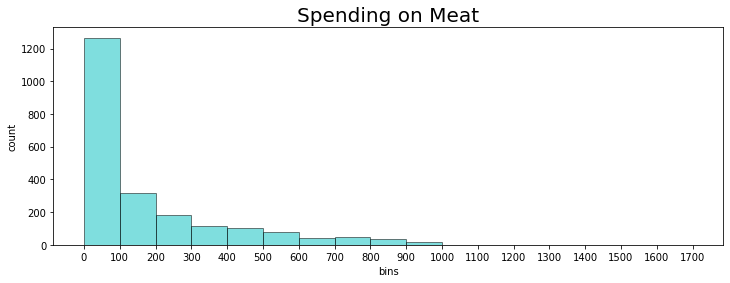

In [29]:
plt.figure(figsize=(12,4))
#create bins
binval=np.arange(0,1800,100)
plt.hist(marketing.MntMeatProducts,bins=binval,alpha=0.5, edgecolor="k",color="c")
plt.title("Spending on Meat",fontsize=20)
plt.xticks(binval)
plt.xlabel("bins")
plt.ylabel("count")

# 4-Scatter plot

In [30]:
marketing.Country.unique()

array(['Spain', 'Canada', 'USA', 'Australia', 'Germany', 'India',
       'Saudi Arabia', 'Mexico'], dtype=object)

In [31]:
marketing['country_color']=marketing.Country.map({'Spain':"c", 'Canada':"b", 'USA':"k",'Australia':'r','Germany':"m", 'India':"g",
       'Saudi Arabia':"y", 'Mexico':"y"})

Text(0, 0.5, 'Fruits')

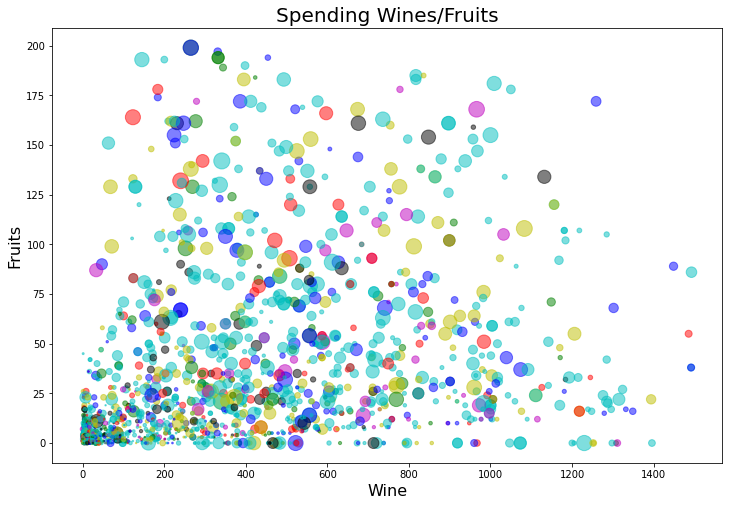

In [32]:
plt.figure(figsize=(12,8))
plt.scatter(marketing.MntWines, marketing.MntFruits,s=marketing.MntFishProducts,  color=marketing.country_color,
            alpha=0.5)

plt.title("Spending Wines/Fruits",fontsize=20)
plt.xlabel("Wine",fontsize=16)
plt.ylabel("Fruits",fontsize=16)


# 5-Pie chart  and Tree chart

In [33]:
simple_bar.head()

,Education,ID
0,2n Cycle,198
1,Basic,54
2,Graduation,1113
3,Master,364
4,PhD,475


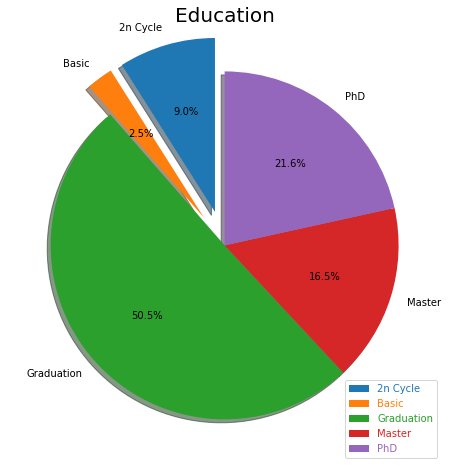

In [34]:
plt.figure(figsize=(12,8))
plt.pie(simple_bar.ID, labels=simple_bar.Education,shadow=True,startangle=90,explode=[0.2,0.2,0,0,0],
       autopct='%.1f%%')
plt.legend(labelcolor= "linecolor")
plt.title("Education",fontsize=20)
plt.show()

<AxesSubplot:>

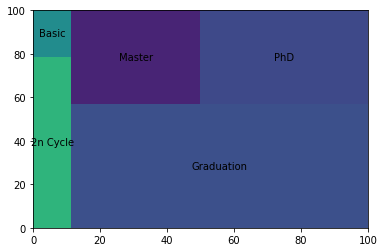

In [35]:
plt.figure(figsize=(6,4))
squarify.plot(sizes=simple_bar.ID, label=simple_bar.Education)

# 6-Subplot

In [36]:
simple_bar.head()

,Education,ID
0,2n Cycle,198
1,Basic,54
2,Graduation,1113
3,Master,364
4,PhD,475


***Option 1***

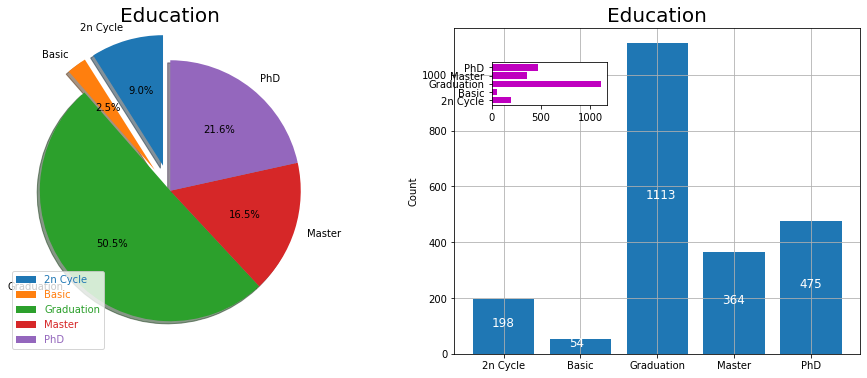

In [37]:
plt.figure(figsize= (16,6))
plt.subplot(1,2,1) # 1 row, 2 column, number
plt.pie(simple_bar.ID, labels=simple_bar.Education,shadow=True,startangle=90,explode=[0.2,0.2,0,0,0],
       autopct='%.1f%%')
plt.legend(labelcolor= "linecolor")
plt.title("Education",fontsize=20)

plt.subplot(1,2,2)
bars= plt.bar(simple_bar.Education, simple_bar.ID)
plt.ylabel("Count")
plt.title("Education",fontsize=20)
plt.grid()

for bar in bars:
    location= bar.get_height()
    plt.text(bar.get_x()+0.25,location/2,location,fontsize=12,color="w")
    
plt.axes([0.58, 0.7, 0.1, 0.1]) # left, bottom,width, height
plt.barh(simple_bar.Education, simple_bar.ID, color="m")


plt.show()

***Option 2***

<BarContainer object of 5 artists>

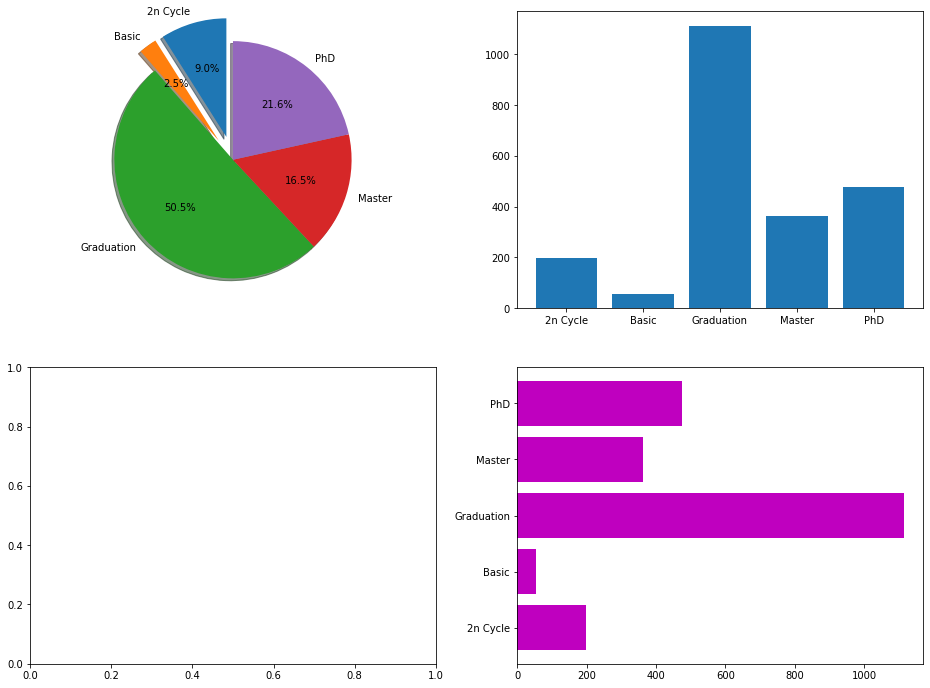

In [38]:
fig, axarr= plt.subplots(2,2,figsize=(16,12))
axarr[0,0].pie(simple_bar.ID, labels=simple_bar.Education,shadow=True,startangle=90,explode=[0.2,0.2,0,0,0],
       autopct='%.1f%%')
axarr[0,1].bar(simple_bar.Education, simple_bar.ID)
axarr[1,1].barh(simple_bar.Education, simple_bar.ID, color="m")

***Option 3***

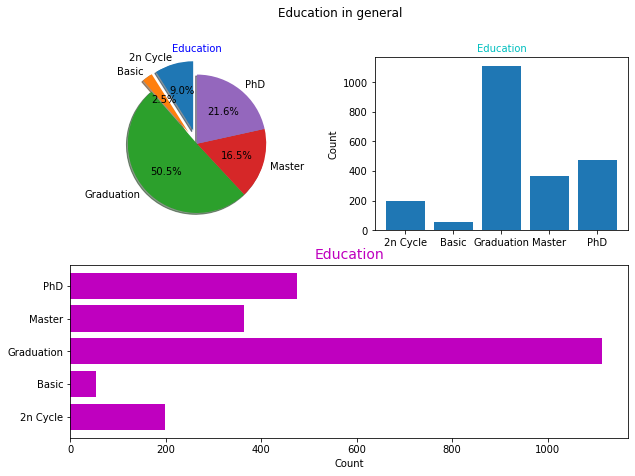

In [39]:
fig=plt.figure(figsize=(10,7))
grid_spec= gridspec.GridSpec(nrows=2, ncols=2)

axes_1= fig.add_subplot(grid_spec[0,0])
axes_2= fig.add_subplot(grid_spec[0,1])
axes_3= fig.add_subplot(grid_spec[1,:])

axes_1.pie(simple_bar.ID, labels=simple_bar.Education,shadow=True,startangle=90,explode=[0.2,0.2,0,0,0],
       autopct='%.1f%%')
axes_1.set_title("Education",fontsize=10,color='b')

axes_2.bar(simple_bar.Education, simple_bar.ID)
axes_2.set_ylabel("Count")
axes_2.set_title("Education",fontsize=10, color='c')

axes_3.barh(simple_bar.Education, simple_bar.ID, color="m")
axes_3.set_xlabel("Count")
axes_3.set_title("Education",fontsize=14, color='m')

fig.suptitle("Education in general")
plt.show()

# 7-Wordcloud

In [40]:
marketing.Education.head()

0    Graduation
1    Graduation
2    Graduation
3    Graduation
4    Graduation
Name: Education, dtype: object

***Join all text***

In [41]:
comment_word= ' '.join(marketing.Education)

In [42]:
comment_word

'Graduation Graduation Graduation Graduation Graduation PhD 2n Cycle Graduation PhD PhD 2n Cycle Master PhD Graduation Graduation Graduation Graduation PhD 2n Cycle Master Master Master Master PhD Graduation Master Graduation Graduation PhD Graduation PhD Graduation PhD PhD Graduation PhD 2n Cycle Master PhD Graduation Graduation PhD 2n Cycle Graduation 2n Cycle Graduation Graduation Master Graduation Graduation 2n Cycle Master 2n Cycle Graduation Basic Graduation Master PhD Graduation Graduation Master Master PhD Master Master Graduation Master 2n Cycle PhD PhD PhD 2n Cycle Master Graduation Graduation Graduation Graduation PhD Master Graduation Graduation Graduation Graduation PhD Graduation 2n Cycle 2n Cycle Graduation PhD Graduation Graduation PhD Graduation PhD Graduation Master Master Master Graduation PhD PhD Graduation PhD PhD PhD Master Master PhD PhD 2n Cycle Graduation Graduation Graduation Graduation Master Graduation Master Master Master Graduation Graduation Graduation Gr

***generate wordcloud***

In [43]:
wc= WordCloud(background_color='white',max_words=1000, stopwords=STOPWORDS)
wc.generate(comment_word)

***show wordcloud***

(-0.5, 399.5, 199.5, -0.5)

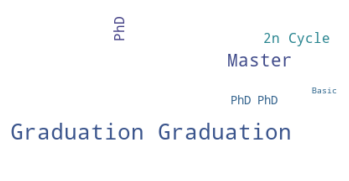

In [44]:
plt.figure(figsize=(6,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')

# 8- Bar chart - at least 1 dimension

In [45]:
marketing.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,country_color
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,1,0,Spain,c
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,1,0,Canada,b
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,0,USA,k
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,0,Australia,r
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,7,1,0,0,0,0,1,0,Spain,c


In [73]:
marketing.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'country_color'],
      dtype='object')

Text(0.5, 0, '')

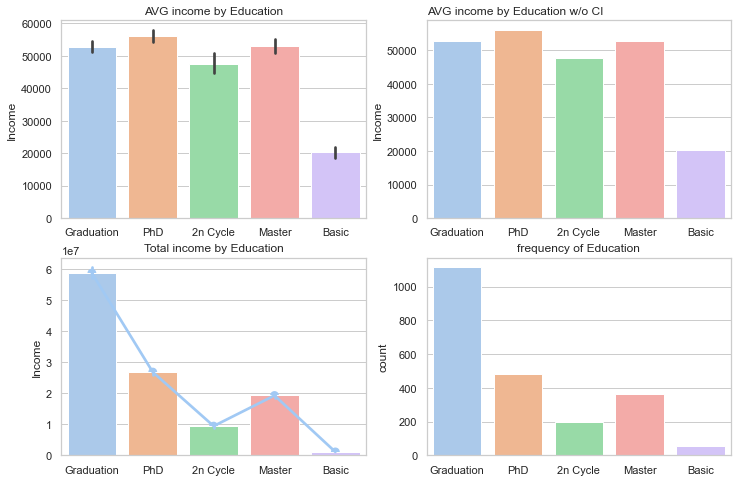

In [102]:
plt.figure(figsize=(12,8))
sns.set_palette('pastel')

plt.subplot(2,2,1)
sns.barplot(data=marketing,x='Education', y='Income')
plt.title('AVG income by Education')
plt.xlabel(None)

plt.subplot(2,2,2)
sns.barplot(data=marketing,x='Education', y='Income',ci= None)
plt.title('AVG income by Education w/o CI',loc='left')
plt.xlabel(None)

plt.subplot(2,2,3)
sns.pointplot(data=marketing,x='Education', y='Income',estimator=sum)
sns.barplot(data=marketing,x='Education', y='Income',estimator=sum,ci=None)
plt.title('Total income by Education')
plt.xlabel(None)

plt.subplot(2,2,4)
sns.countplot(data=marketing , x= 'Education')
plt.title('frequency of Education')
plt.xlabel(None)

# 9- Histogram - at least 1 measure

***1 measure***

C:\Users\tangh\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tangh\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MntMeatProducts', ylabel='Density'>

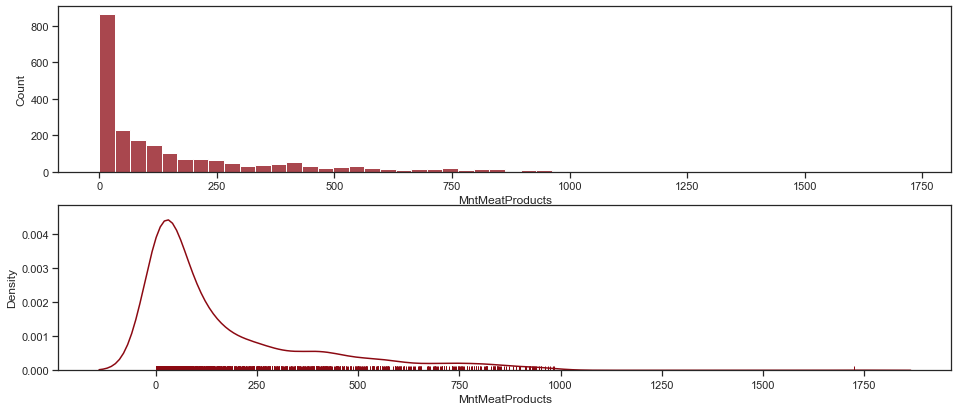

In [241]:
sns.set_palette(reversed(sns.color_palette('Reds',12)),12)
plt.figure(figsize=(16,14))
                
plt.subplot(4,1,1)
sns.histplot(marketing.MntMeatProducts)

plt.subplot(4,1,2)
sns.distplot(marketing.MntMeatProducts,hist=False, rug=True)


***1 measure, 1 dimension***

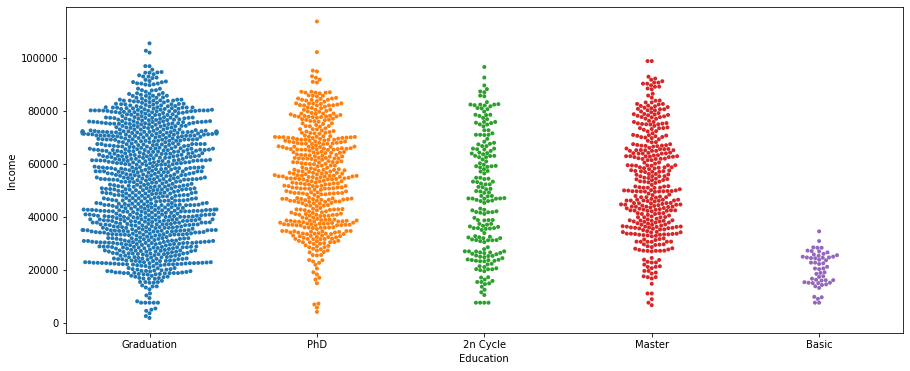

In [159]:
plt.figure(figsize= (15,6))
sns.swarmplot(data=marketing,x='Education',y='Income',size=4);

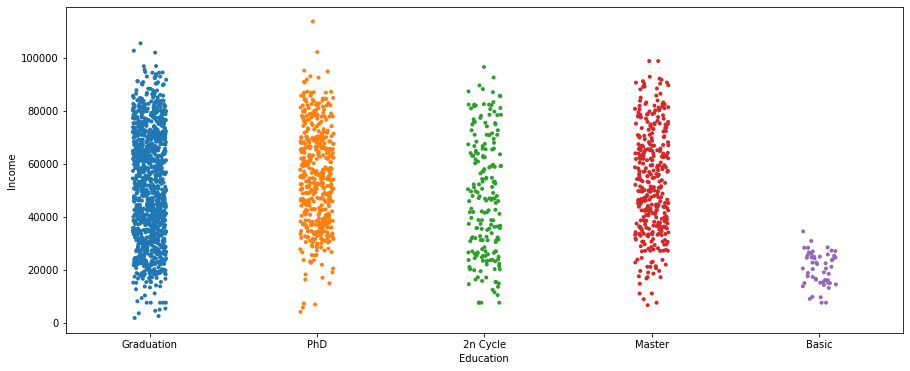

In [160]:
plt.figure(figsize= (15,6))
sns.stripplot(data=marketing,x='Education',y='Income',size=4);

***1 measure, 2 dimensions***

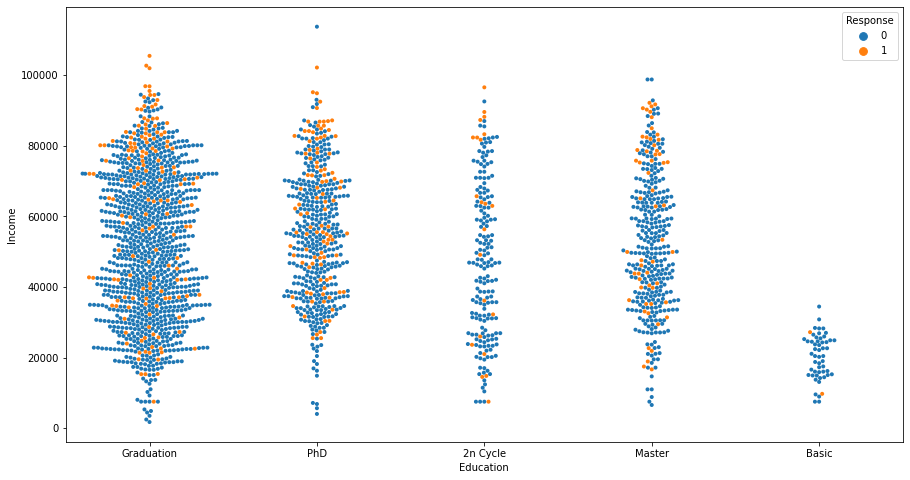

In [155]:
plt.figure(figsize= (15,8))
sns.swarmplot(data=marketing,x='Education',
              y='Income',hue='Response',size=4);

***Break by columns or rows***

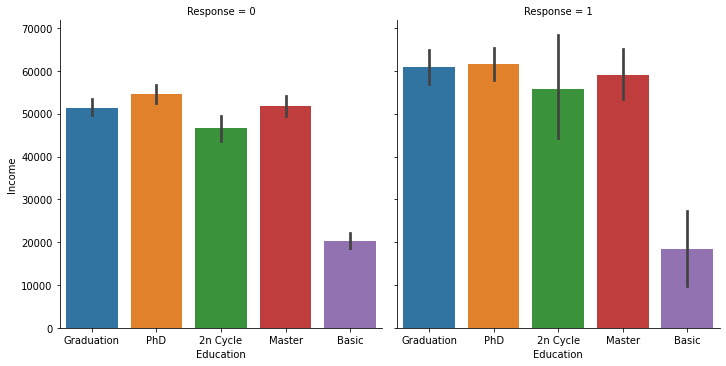

In [14]:
sns.catplot(data=marketing,x='Education',y='Income',col='Response',kind='bar')
#Options are: "strip", "swarm", "box", "violin","boxen", "point", "bar", or "count".

# 10- Boxplot - at least 1 measures

<AxesSubplot:xlabel='Education', ylabel='MntMeatProducts'>

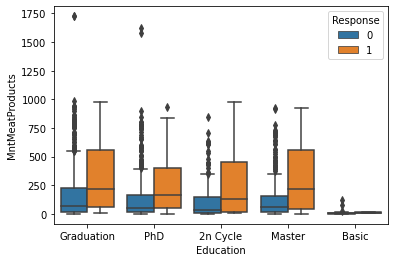

In [15]:
sns.boxplot(data= marketing, x= 'Education',y='MntMeatProducts',hue='Response')

<AxesSubplot:xlabel='Education', ylabel='MntMeatProducts'>

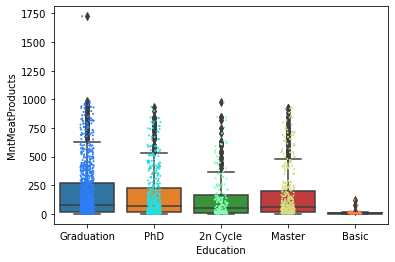

In [171]:
sns.boxplot(data= marketing, x= 'Education',y='MntMeatProducts')
sns.stripplot(data= marketing, x= 'Education',y='MntMeatProducts',size=2,palette='rainbow')

# 11- Scatter plot-at least 2 measures

***2 measures***

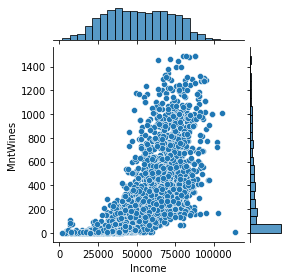

In [115]:
sns.jointplot(data=marketing, x = 'Income',y='MntWines',height=4, 
              kind = "scatter"); 

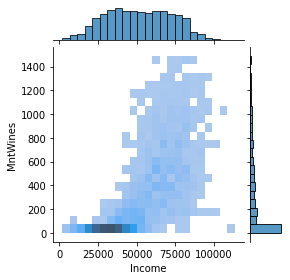

In [117]:
sns.jointplot(data=marketing, x = 'Income',y='MntWines',height=4, 
              kind = "hist"); 

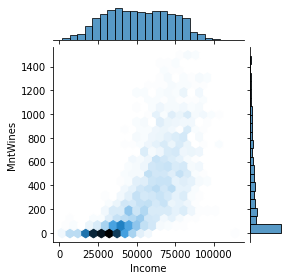

In [121]:
sns.jointplot(data=marketing, x = 'Income',y='MntWines',height=4, 
              kind = "hex"); 

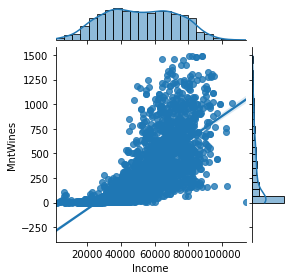

In [122]:
sns.jointplot(data=marketing, x = 'Income',y='MntWines',height=4, 
              kind = "reg");

***2 measures & 1 dimension***

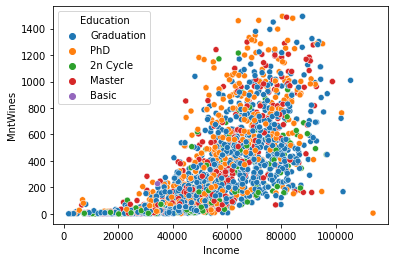

In [80]:
sns.scatterplot(data=marketing, x='Income',y='MntWines',hue="Education");

***2 measure & 2 dimensions***

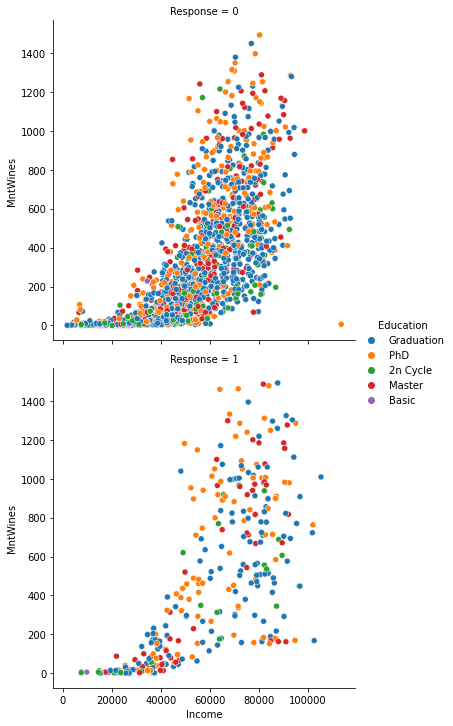

In [83]:
sns.relplot(data=marketing, x='Income',y='MntWines',
            hue="Education",row='Response')

# 12- Regression Plot- 2 measures

***2 measures***

<AxesSubplot:xlabel='Income', ylabel='MntWines'>

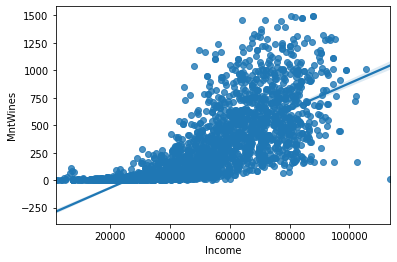

In [125]:
sns.regplot(data=marketing, x='Income',y='MntWines')

***2 measures and add-in dimension***

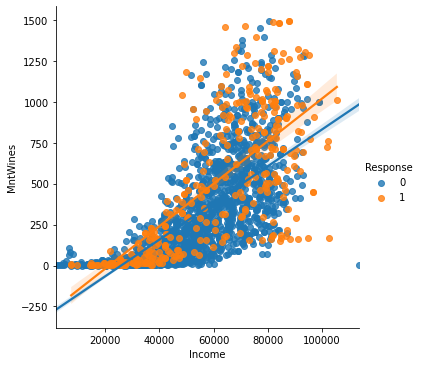

In [128]:
sns.lmplot(data = marketing, x='Income',y='MntWines',
           hue= 'Response')

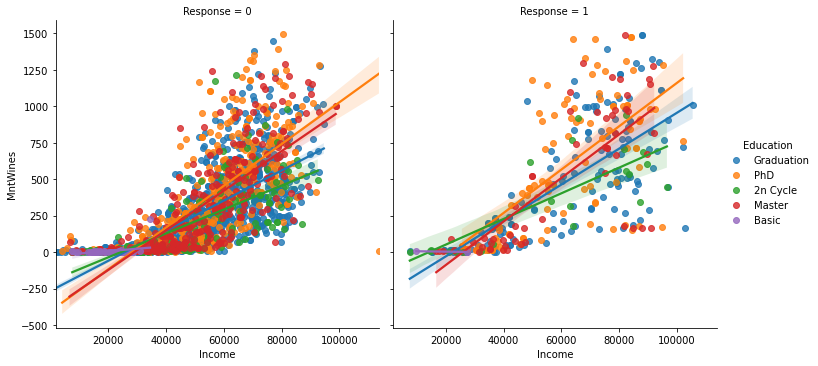

In [133]:
sns.lmplot(data = marketing, x='Income',y='MntWines',
           col = 'Response',hue='Education') # can replace with row

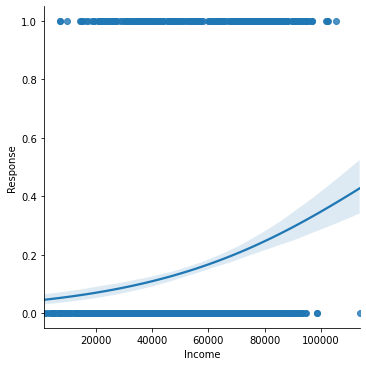

In [137]:
sns.lmplot(data = marketing, x='Income', y='Response',
           logistic=True);

# 13- Line chart

In [179]:
snslinechart= marketing[['Year_Birth','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']]

In [183]:
snslinechart.set_index('Year_Birth',inplace= True)

In [184]:
snslinechart.head(5)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Year_Birth,,,,,,
1970,189,104,379,111,189,218
1961,464,5,64,7,0,37
1958,134,11,59,15,2,30
1967,10,0,1,0,0,0
1989,6,16,24,11,0,34


In [207]:
sns.set_style('darkgrid') #whitegrid,white,dark,ticks

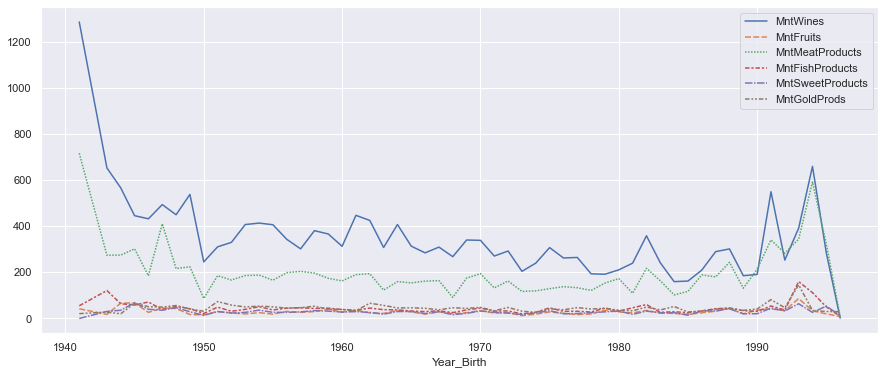

In [206]:
plt.figure(figsize=(15,6))
sns.lineplot(data=snslinechart, ci=None);

# Seaborn style

In [217]:
sns.set_style('ticks') #whitegrid,white,dark,ticks

deep


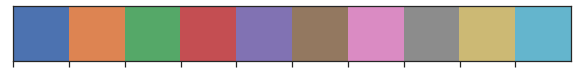

deep6


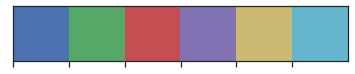

muted


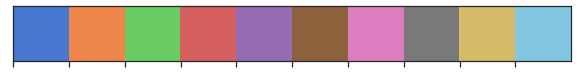

muted6


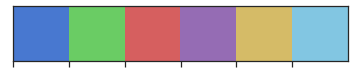

pastel


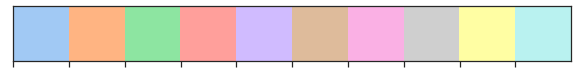

pastel6


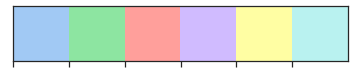

bright


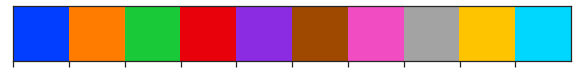

bright6


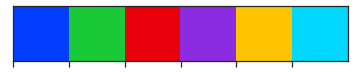

dark


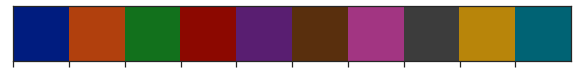

dark6


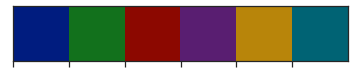

colorblind


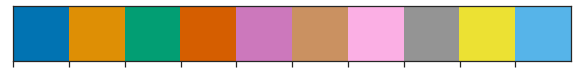

colorblind6


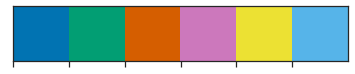

In [221]:
for p in sns.palettes.SEABORN_PALETTES:
    sns.set_palette(p)
    print(p)
    sns.palplot(sns.color_palette())
    plt.show()

In [218]:
sns.set_palette("husl", 9) #

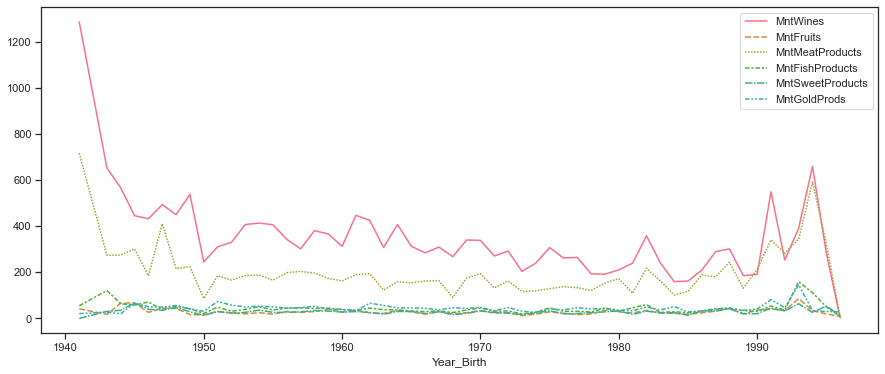

In [219]:
plt.figure(figsize=(15,6))
sns.lineplot(data=snslinechart, ci=None);

# Heat map

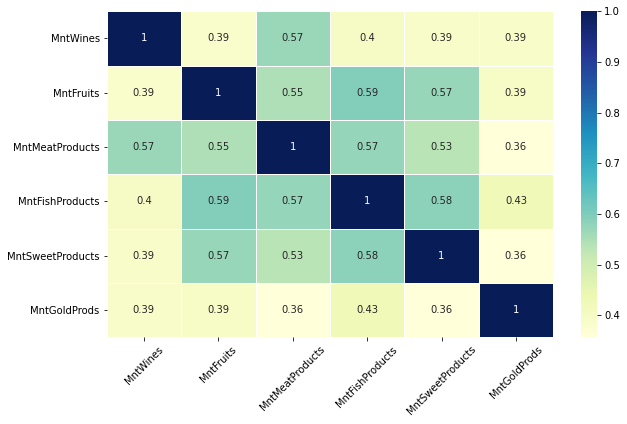

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(marketing.loc[:,'MntWines':'MntGoldProds'].corr(),
            linewidths=0.5,cbar=True,cmap='YlGnBu',annot=True)
plt.xticks(rotation=45)
plt.show()

# FacetGrid

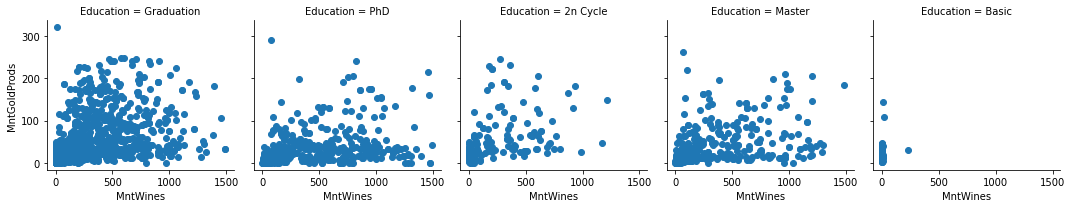

In [69]:
g= sns.FacetGrid(marketing, col='Education',aspect=1)
g.map(plt.scatter,'MntWines','MntGoldProds');

C:\Users\tangh\AppData\Roaming\Python\Python38\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


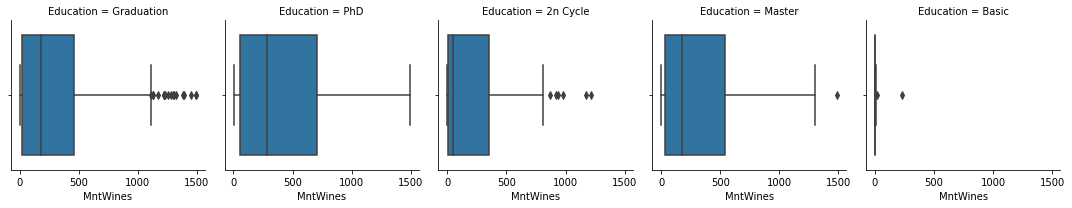

In [75]:
g= sns.FacetGrid(marketing, col='Education')
g.map(sns.boxplot,'MntWines')

C:\Users\tangh\AppData\Roaming\Python\Python38\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


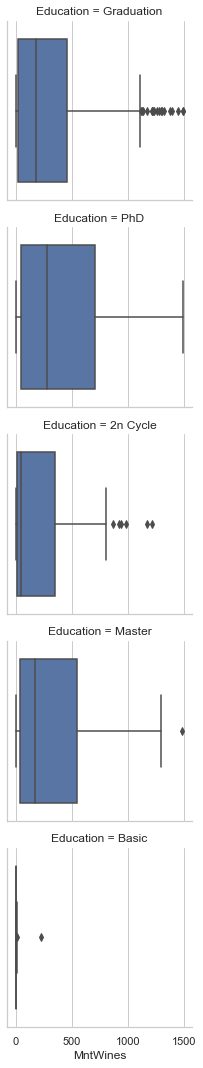

In [92]:
sns.set(style="whitegrid")
g= sns.FacetGrid(marketing, row='Education',row_order=['Graduation','PhD','2n Cycle','Master','Basic'])
g.map(sns.boxplot,'MntWines')

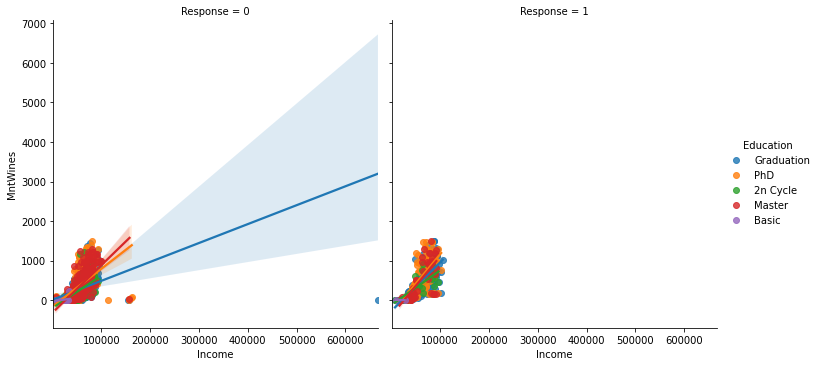

In [81]:
sns.lmplot(data = marketing, x='Income',y='MntWines',
           col = 'Response',hue='Education'); # can replace with row

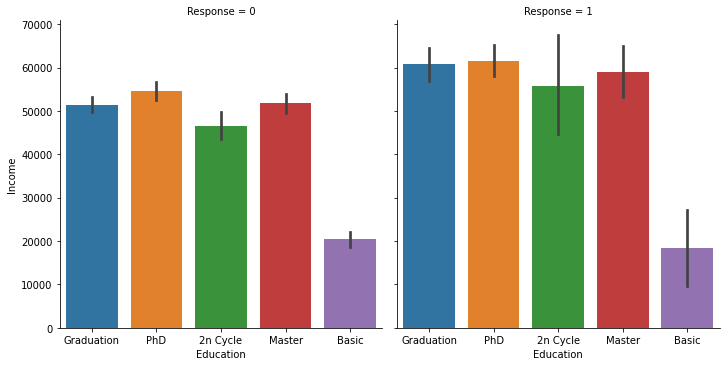

In [82]:
sns.catplot(data=marketing,x='Education',y='Income',col='Response',kind='bar');
#Options are: "strip", "swarm", "box", "violin","boxen", "point", "bar", or "count".

# Pair Grid

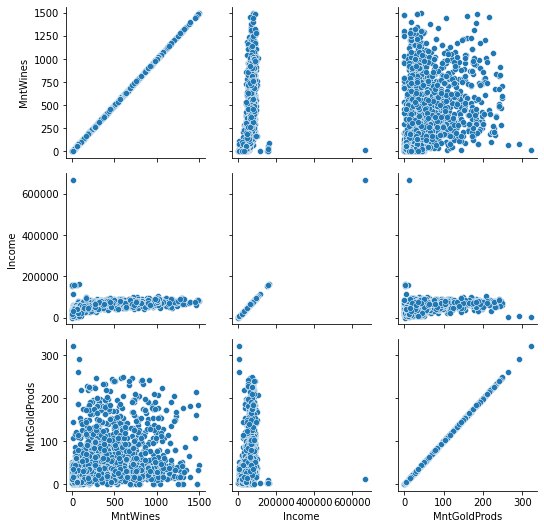

In [89]:
g= sns.PairGrid(data=marketing,vars=['MntWines','Income','MntGoldProds'])
g.map(sns.scatterplot);

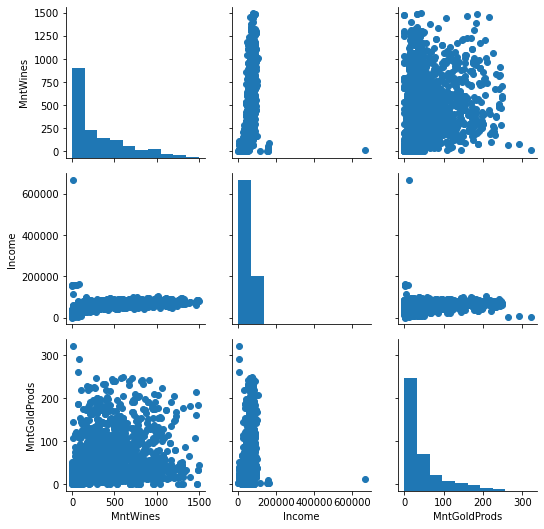

In [90]:
g= sns.PairGrid(data=marketing,vars=['MntWines','Income','MntGoldProds'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

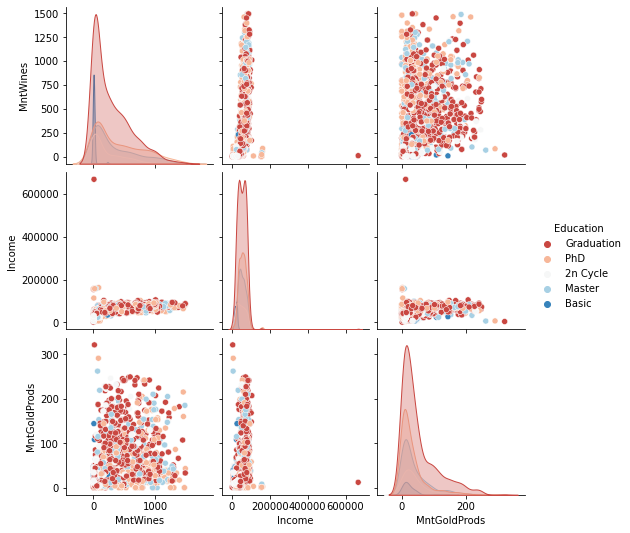

In [91]:
sns.pairplot(data=marketing, vars=['MntWines','Income','MntGoldProds'],
            kind='scatter',
            hue='Education',
            palette='RdBu',
            diag_kws={'alpha':.3})

# Violin plot

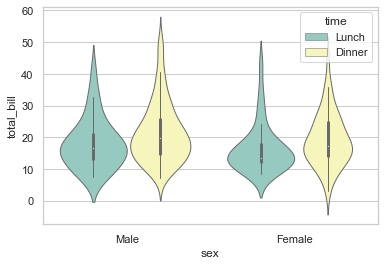

In [99]:
tips= sns.load_dataset('tips')
sns.set(style="whitegrid")
sns.violinplot(data=tips,y='total_bill',x='sex',hue='time',palette="Set3", linewidth=1);

https://mode.com/blog/violin-plot-examples/

https://alexgude.com/blog/distribution-plots/